<a href="https://colab.research.google.com/github/Tejaswini-adhav/edunet/blob/main/Project_Wind_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("archive.csv")
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [3]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [5]:
# Predict tomorrow’s maximum temperature (T.MAX) based on past weather data.


# Step 2: Data Preprocessing (Handle missing values, convert date to datetime object)
df['DATE'] = pd.to_datetime(df['DATE'])
# Example: Filling missing 'TMAX' values with the mean.  Replace with a more sophisticated method if needed.
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
#Further preprocessing as needed (e.g., feature engineering)

In [6]:
# Step 3: Feature Engineering
# Create lagged features (previous day's temperature)
df['T.MAX_lag1'] = df['T.MAX'].shift(1)
# Fill NaN values created by shifting
df['T.MAX_lag1'].fillna(method='bfill', inplace=True)
# Add other relevant features (e.g., day of the week, month, etc)
df['dayofweek'] = df['DATE'].dt.dayofweek
df['month'] = df['DATE'].dt.month

<ipython-input-6-255037d14d4c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['T.MAX_lag1'].fillna(method='bfill', inplace=True)
<ipython-input-6-255037d14d4c>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['T.MAX_lag1'].fillna(method='bfill', inplace=True)


In [7]:
# Step 4: Define features (X) and target (y)
X = df[['T.MAX_lag1', 'dayofweek', 'month']] # Include other relevant features
y = df['T.MAX']


In [8]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 6: Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.048608760354708
R-squared: 0.8007280792925254


In [11]:
# Step 8: Prediction for tomorrow (Illustrative example)
# You would need to get the actual values for yesterday's TMAX and the day of the week and month for tomorrow
# Example (replace with real values):
tomorrow_data = pd.DataFrame({'T.MAX_lag1': [df['T.MAX'].iloc[-1]], 'dayofweek':[df['dayofweek'].iloc[-1]], 'month': [df['month'].iloc[-1]]})
tomorrow_prediction = model.predict(tomorrow_data)[0]

print(f"Predicted maximum temperature for tomorrow: {tomorrow_prediction}")

Predicted maximum temperature for tomorrow: 2.459356874175283


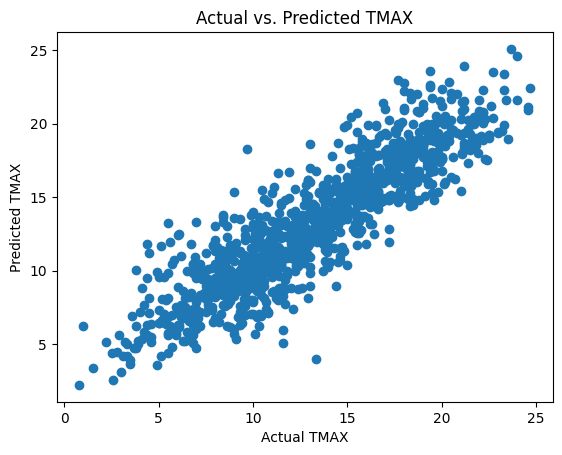

In [12]:
# Step 9 (Optional): Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual TMAX")
plt.ylabel("Predicted TMAX")
plt.title("Actual vs. Predicted TMAX")
plt.show()

In [13]:
# Predict tomorrow’s wind speed (WIND) based on today’s temperature (T.MAX, T.MIN) and rainfall (RAIN).

# Step 2: Data Preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df['RAIN'] = df['RAIN'].fillna(0)  # Fill missing rainfall with 0
df['WIND'] = df['WIND'].fillna(df['WIND'].mean()) # Fill missing wind speed with mean
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
df['T.MIN'] = df['T.MIN'].fillna(df['T.MIN'].mean())

# Step 3: Feature Engineering
df['T.MAX_lag1'] = df['T.MAX'].shift(1)
df['T.MIN_lag1'] = df['T.MIN'].shift(1)
df['RAIN_lag1'] = df['RAIN'].shift(1)

# Fill NaN values created by shifting
for col in ['T.MAX_lag1', 'T.MIN_lag1', 'RAIN_lag1']:
    df[col].fillna(method='bfill', inplace=True)

# Step 4: Define features (X) and target (y)
X = df[['T.MAX_lag1', 'T.MIN_lag1', 'RAIN_lag1']]
y = df['WIND']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Prediction for tomorrow
tomorrow_data = pd.DataFrame({
    'T.MAX_lag1': [df['T.MAX'].iloc[-1]],
    'T.MIN_lag1': [df['T.MIN'].iloc[-1]],
    'RAIN_lag1': [df['RAIN'].iloc[-1]]
})

tomorrow_wind_prediction = model.predict(tomorrow_data)[0]
print(f"Predicted wind speed for tomorrow: {tomorrow_wind_prediction}")

Mean Squared Error: 23.256806422546124
R-squared: 0.07246313627880685
Predicted wind speed for tomorrow: 12.117351545278721


<ipython-input-13-254892005e32>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='bfill', inplace=True)
<ipython-input-13-254892005e32>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='bfill', inplace=True)


In [14]:
# Estimate the amount of rainfall (RAIN) based on temperature (T.MAX, T.MIN) and wind speed (WIND).

# Step 4: Define features (X) and target (y)
X = df[['T.MAX', 'T.MIN', 'WIND']]  # Use T.MAX, T.MIN, and WIND as features
y = df['RAIN']  # RAIN is the target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Prediction (example)
# Create a DataFrame for the new data point
new_data = pd.DataFrame({'T.MAX': [25], 'T.MIN': [15], 'WIND': [10]})  # Example values
predicted_rainfall = model.predict(new_data)[0]
print(f"Predicted rainfall: {predicted_rainfall}")

Mean Squared Error: 15.715222597191554
R-squared: 0.01775246170375555
Predicted rainfall: 1.6790169313924717


In [15]:
# Predict whether the temperature will drop the next day based on today's weather conditions


# Data preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())

# Feature engineering: Create a lagged feature for T.MAX
df['T.MAX_lag1'] = df['T.MAX'].shift(1)
df['T.MAX_lag1'].fillna(method='bfill', inplace=True)  # Backfill the first missing value

# Include other relevant features (e.g., day of the week, month)
df['dayofweek'] = df['DATE'].dt.dayofweek
df['month'] = df['DATE'].dt.month

# Define features (X) and target (y)
X = df[['T.MAX_lag1', 'dayofweek', 'month']]
y = df['T.MAX']  # Predicting the next day's max temperature

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict tomorrow's temperature
# Get the last row's features
last_day_features = X.iloc[-1].values.reshape(1,-1) #reshape for single prediction


tomorrow_prediction = model.predict(last_day_features)[0]
print(f"Predicted maximum temperature for tomorrow: {tomorrow_prediction}")

# Determine temperature drop
today_temp = df['T.MAX'].iloc[-1]
if tomorrow_prediction < today_temp:
    print("Temperature is predicted to drop tomorrow.")
else:
    print("Temperature is not predicted to drop tomorrow.")

Mean Squared Error: 4.048608760354708
R-squared: 0.8007280792925254
Predicted maximum temperature for tomorrow: 3.996593804594632
Temperature is not predicted to drop tomorrow.


<ipython-input-15-1912cd7cd79a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['T.MAX_lag1'].fillna(method='bfill', inplace=True)  # Backfill the first missing value
<ipython-input-15-1912cd7cd79a>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['T.MAX_lag1'].fillna(method='bfill', inplace=True)  # Backfill the first missing value
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not h

In [16]:
# Estimate the amount of rainfall (RAIN) using wind speed (WIND) and temperature (T.MAX, T.MIN).


# Load the dataset
df = pd.read_csv("archive.csv")

# Data preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df['RAIN'] = df['RAIN'].fillna(0)
df['WIND'] = df['WIND'].fillna(df['WIND'].mean())
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
df['T.MIN'] = df['T.MIN'].fillna(df['T.MIN'].mean())

# Feature engineering
df['T.MAX_lag1'] = df['T.MAX'].shift(1)
df['T.MIN_lag1'] = df['T.MIN'].shift(1)
df['WIND_lag1'] = df['WIND'].shift(1)

for col in ['T.MAX_lag1', 'T.MIN_lag1', 'WIND_lag1']:
    df[col].fillna(method='bfill', inplace=True)

# Define features (X) and target (y)
X = df[['T.MAX', 'T.MIN', 'WIND']]
y = df['RAIN']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction
new_data = pd.DataFrame({'T.MAX': [25], 'T.MIN': [15], 'WIND': [10]})
predicted_rainfall = model.predict(new_data)[0]
print(f"Predicted rainfall: {predicted_rainfall}")


Mean Squared Error: 15.715222597191554
R-squared: 0.01775246170375555
Predicted rainfall: 1.6790169313924717


<ipython-input-16-ad59f0f781ad>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='bfill', inplace=True)
<ipython-input-16-ad59f0f781ad>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='bfill', inplace=True)


In [17]:
# Predict wind speed (WIND) based on maximum temperature (T.MAX), minimum temperature (T.MIN), and rainfall (RAIN).



# Data preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df['RAIN'] = df['RAIN'].fillna(0)
df['WIND'] = df['WIND'].fillna(df['WIND'].mean())
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
df['T.MIN'] = df['T.MIN'].fillna(df['T.MIN'].mean())

# Feature engineering
df['T.MAX_lag1'] = df['T.MAX'].shift(1)
df['T.MIN_lag1'] = df['T.MIN'].shift(1)
df['RAIN_lag1'] = df['RAIN'].shift(1)

for col in ['T.MAX_lag1', 'T.MIN_lag1', 'RAIN_lag1']:
    df[col].fillna(method='bfill', inplace=True)

# Define features (X) and target (y)
X = df[['T.MAX', 'T.MIN', 'RAIN']]  # Use T.MAX, T.MIN, and RAIN as features
y = df['WIND']  # Predict WIND

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction
new_data = pd.DataFrame({'T.MAX': [25], 'T.MIN': [15], 'RAIN': [5]}) # Example values, replace with actual values
predicted_wind = model.predict(new_data)[0]
print(f"Predicted wind speed: {predicted_wind}")

Mean Squared Error: 23.09955346206096
R-squared: 0.0787347590944778
Predicted wind speed: 7.33373907783537


<ipython-input-17-a051179cc7d8>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='bfill', inplace=True)
<ipython-input-17-a051179cc7d8>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='bfill', inplace=True)


In [18]:
# Predict minimum temperature (T.MIN) using wind speed (WIND) and rainfall (RAIN).


# Data preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df['RAIN'] = df['RAIN'].fillna(0)
df['WIND'] = df['WIND'].fillna(df['WIND'].mean())
df['T.MAX'] = df['T.MAX'].fillna(df['T.MAX'].mean())
df['T.MIN'] = df['T.MIN'].fillna(df['T.MIN'].mean())

# Feature engineering
df['WIND_lag1'] = df['WIND'].shift(1)
df['RAIN_lag1'] = df['RAIN'].shift(1)

for col in ['WIND_lag1', 'RAIN_lag1']:
    df[col].fillna(method='bfill', inplace=True)

# Define features (X) and target (y)
X = df[['WIND', 'RAIN', 'WIND_lag1', 'RAIN_lag1']]  # Use WIND, RAIN, and their lagged values as features
y = df['T.MIN']  # Predict T.MIN

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction
new_data = pd.DataFrame({'WIND': [10], 'RAIN': [5], 'WIND_lag1': [8], 'RAIN_lag1': [3]})  # Example values
predicted_tmin = model.predict(new_data)[0]
print(f"Predicted minimum temperature: {predicted_tmin}")

Mean Squared Error: 17.824946747721977
R-squared: 0.018717373076874266
Predicted minimum temperature: 6.683762260432171


<ipython-input-18-2a0900117d51>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='bfill', inplace=True)
<ipython-input-18-2a0900117d51>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='bfill', inplace=True)
